In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import mglearn

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from matplotlib import font_manager,rc, rcParams
import platform

if platform.system() == 'Windows':
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

rcParams['axes.unicode_minus'] = False

%matplotlib inline

텍스트 데이터는 주로 글자가 연결된 문자열로 표현된다. 텍스트 데이터는 길이도 대부분 다르고 수치형 데이터와 매우 다르므로 전처리 과정을 잘 거쳐야 한다.

# 문자열 데이터 타입

- 범주형 데이터 
    - 원핫인코딩을 적용할 수 있으나 '붉은','빨간','빨감' 등 표기차이나 오타가 있을시 하나로 합쳐야함
- 범주에 의미를 연결시킬 수 있는 임의의 문자열 : 텍스트
    - ex)텍스트 필드로 설문을 받는 경우 -> 매우 특이한 이름을 적을 수 있음
    - 보편적인 값이나 범주를 정의하는게 최선. 인코딩할 수 없는 값은 '그 외' 범주를 이용할 수도 있음
- 구조화된 문자열 데이터
    - 범주에 속하지는 않지만 주소, 장소, 날짜, 전화번호, 식별번호처럼 일정한 구조를 가지기도 한다.
- 텍스트 데이터
    - 트위터, 채팅, 리뷰, 문학작품, 위키문서 등
    
텍스트 분석에서는 데이터셋을 말뭉치(corpus)라 하고, 하나의 텍스트를 의미하는 각 데이터 포인트를 문서(document)라고 한다.



In [ ]:
# 아래 파일이 존재하지만 크기가 큰 관계로 같이 업로드하지는 않음

# 예제) 영화 리뷰 감성 분석
IMDb 웹사이트에서 수집한 영화 리뷰 데이터셋을 사용
(http://ai.stanford.edu/~amaas/data/sentiment/)<br>
1~10점까지의 점수를 매기는데 7점 이상은 '양성', 4점 이하는 '음성'인 이진 분류 데이터셋으로 구분되어있고 중간값은 포함하지 않는다.

In [3]:
!tree aclImdb_v1/aclImdb

폴더 PATH의 목록입니다.
볼륨 일련 번호는 84CA-3D61입니다.
C:\USERS\HP\DESKTOP\최영조\코딩공부\DATA_ANALYSIS_EXERCISE\MACHINE_LEARNING(SCIKIT-LEARN)\ACLIMDB_V1\ACLIMDB
├─test
│  ├─neg
│  └─pos
└─train
    ├─neg
    └─pos


In [4]:
from sklearn.datasets import load_files

In [6]:
reviews_train = load_files('aclImdb_v1/aclImdb/train/')

In [7]:
text_train,y_train = reviews_train.data, reviews_train.target
print(type(text_train))
print(len(text_train))
print(text_train[6])
print(y_train[6])

<class 'list'>
25000
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."
1


In [8]:
# <br /> 같은 줄바꿈 태그를 포함하고 있으므로 데이터 정리
text_train = [doc.replace(b"<br />",b" ") for doc in text_train]

In [9]:
text_train[6]

b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.  Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life.   I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."

In [10]:
print('클래스별 샘플의 수 : ',np.bincount(y_train))

클래스별 샘플의 수 :  [12500 12500]


In [11]:
reviews_test = load_files('aclImdb_v1/aclImdb/test/')
text_test,y_test = reviews_test.data, reviews_test.target
print(type(text_test))
print(len(text_test))

<class 'list'>
25000


In [12]:
print(text_test[1])
print(y_test[1])

b'I don\'t know how this movie has received so many positive comments. One can call it "artistic" and "beautifully filmed", but those things don\'t make up for the empty plot that was filled with sexual innuendos. I wish I had not wasted my time to watch this movie. Rather than being biographical, it was a poor excuse for promoting strange and lewd behavior. It was just another Hollywood attempt to convince us that that kind of life is normal and OK. From the very beginning I asked my self what was the point of this movie,and I continued watching, hoping that it would change and was quite disappointed that it continued in the same vein. I am so glad I did not spend the money to see this in a theater!'
0


In [13]:
text_test = [doc.replace(b"<br />",b" ") for doc in text_test]

In [14]:
np.bincount(y_test)

array([12500, 12500], dtype=int64)

## 풀려는 문제 : 
리뷰가 하나 주어졌을 때 텍스트의 내용을 보고 양성인지 음성인지 구분하는 이진 분류<br>
텍스트의 문자열 표현을 머신러닝 알고리즘에 적용할 수 있도록 수치 표현으로 바꿔야함

# 텍스트 데이터를 BOW로 표현하기
BOW 방법을 쓰면 장, 문단, 문장, 서식 같은 입력 텍스트의 구조 대부분을 잃고, 각 단어가 말뭉치에 있는 텍스트에 얼마나 많이 나타나는지만 헤아린다. 구조와 상관없이 단어의 출현 횟수만 세기 때문에 텍스트를 담는 '가방(bag)'으로 생각할 수 있다.<br>
전체 말뭉치에 대해 BOW 표현을 하기 위해서는 다음 세 단계를 거친다.
1. 토큰화(tokenization) : 각 문서를 문서에 포함된 단어(토큰)로 나눈다. 공백이나 구두점 등을 기준으로 분리
2. 어휘 사전 구축 :  모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매긴다.(알파벳 순서)
3. 인코딩 : 어휘 사전의 단어가 문서마다 몇 번이나 나타나는지를 헤아린다.

In [15]:
# 예시
bards_words = ['The fool doth think he is wise','but the wise man knows himself to be a fool']

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [16]:
# CountVectorizer의 fit 메서드는 훈련 데이터를 토큰으로 나누고 어휘 사전을 구축하여 vocabulary_ 속성에 저장
print('어휘 사전의 크기 : ',len(vect.vocabulary_))
# 딕셔너리의 value들은 그냥 단어의 순서
# 아래 bag_of_words의 컬럼순서와 일치하는 순서이다.
print('어휘 사전의 내용 : \n',vect.vocabulary_)

어휘 사전의 크기 :  13
어휘 사전의 내용 : 
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [17]:
bag_of_words = vect.transform(bards_words)
# SciPy 희소 행렬로 저장되어 있음
bag_of_words

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [18]:
# 작은 데이터셋이기에 ndarray로 바꿔서 볼 수 있지만 대용량 데이터셋에서는 메모리 에러가 발생할 수 있으므로 주의
# 그냥 SciPy 행렬로 두는게 나음
bag_of_words.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]], dtype=int64)

각각의 행은 하나의 데이터 포인트를 나타내고, 각 특성은 어휘 사전에 있는 각 단어에 대응한다. 대부분의 문서는 어휘 사전에 있는 단어 중 일부만 포함하므로, 즉 특성 배열의 대부분의 원소가 0이라서 희소 행렬을 사용한다.

위의 bag_of_words를 보면 두 문자열 모두 같은 단어를 두 개 이상 가지고 있지 않음

### 영화 리뷰에 관한 BOW

In [19]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
# 어느정도 크기의 행렬인지 설명을 보면 나와있음
repr(X_train)

"<25000x74849 sparse matrix of type '<class 'numpy.int64'>'\n\twith 3431196 stored elements in Compressed Sparse Row format>"

In [20]:
# 66339번째 특성이 'the'
vect.vocabulary_['the']

66339

In [25]:
# get_features_names() 메서드 주목, 특성(단어)들을 list객체로 저장
feature_names = vect.get_feature_names()

print('특성 개수: ',len(feature_names))
print('\n처음 20개 특성:\n',feature_names[:20])   # 숫자처럼 보이지만 리뷰 어딘가 나타난 숫자들임(사실상 string)
print('\n20010에서 20030까지 특성:\n',feature_names[20010:20031])
print('\n매 2000번째 특성:\n ',feature_names[::2000])

특성 개수:  74849

처음 20개 특성:
 ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']

20010에서 20030까지 특성:
 ['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea', 'dread']

매 2000번째 특성:
  ['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [23]:
np.argwhere(X_train[:,9] == 1)

array([[  554,     0],
       [ 6583,     0],
       [ 7758,     0],
       [ 9637,     0],
       [10764,     0],
       [15068,     0],
       [16627,     0],
       [17873,     0],
       [22458,     0],
       [23321,     0],
       [23473,     0]])

In [58]:
# 007이 포함된 것을 찾아보는데 get_feature_names를 통해 보면 007이 10번째 단어이다.
# X_train에서 행은 각 문장(여기서는 리뷰1개에 대해), 열은 매치되는 단어들이다.
[text_train[i] for i in np.argwhere(X_train[:,9] == 1)[:,0]]

[b'"Dutch Schultz", AKA Arthur Fleggenheimer, was a real person and his rather nasty life is fairly well documented. This movie which purports to depict his life should have used a fictional character, because the overdramatized events are too strong a departure from the facts and the chronology. Not only that, it ignores some interesting details which other versions have included such as the public relations fiasco in upstate N.Y. and his religious conversion. It is true that he was executed by Luciano, Lansky, et. al. but that\'s as far as it goes. The exploding plate scene which represents Luciano carrying out the execution of Bo Weinberg in his own home, assisted by his own mother is rediculous. Also, there is the scene in which Dutch approaches his own mother to pay protection to Legs Diamond. It just doesn\'t work. The character of Mrs. Fleggenheimer doesn\'t work either. This movie does not need a doting Jewish mother for comic relief. The lame representation of Legs Diamond was

In [62]:
# 25000개의 영화 리뷰, 74849개의 단어 추출, 당연히 거의 대부분이 0인 희소행렬이다.
X_train.shape

(25000, 74849)

In [65]:
25000*74849

1871225000

In [64]:
# 1외에 2나 3이 포함될 수도 있으므로 0이 아닌 모든 원소들의 개수는 아님
X_train.sum().sum()

5576703

In [30]:
# the가 몇번째 단어인지 확인
np.where(np.array(feature_names)=='the')

(array([66339], dtype=int64),)

In [70]:
# 0,1 외에도 여러 숫자가 행렬에 포함됨
# 다음 각 결과는 the가 각 문단에서 몇번씩 쓰였나를 나타낸 것(0번은 제외)
X_train[:,66339][X_train[:,66339] != 0]

matrix([[ 3, 13,  4, ..., 15,  9, 16]], dtype=int64)

어휘 사전을 보면 dra로 시작하는 단어를 볼 수 있는데 draught, drawback, drawer처럼 단수와 복수형이 서로 다른 단어로 어휘 사전에 포함되어있다. 이런 단어들은 의미가 매우 비슷하므로 다른 특성으로 간주하는 것은 별로 좋지 않다.

일단 특성 추출 방법을 개선하기 전에 분류기를 만들어 성능을 확인하도록 한다.

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(solver='liblinear'),X_train,y_train,cv=5)

In [74]:
scores

array([0.8824, 0.876 , 0.8822, 0.8884, 0.8776])

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':np.logspace(-3,1,5)}
grid = GridSearchCV(LogisticRegression(solver='liblinear'),param_grid,cv=5)

In [76]:
grid.fit(X_train,y_train)
print("최고점수 : ",grid.best_score_)
print('최적의 매개변수 : ',grid.best_params_)

최고점수 :  0.8881599999999998
최적의 매개변수 :  {'C': 0.1}


나쁘지 않은 수치를 보여준다. 이제 단어 추출 방법을 개선할 차례이다.
CounterVectorizer는 정규표현식을 사용해 토큰을 추출한다.<br>
기본적으로 '\b\w\w+\b'를 사용한다. 경계(\b)가 구분되고 적어도 둘 이상의 문자나 숫자(\w)가 연속된 단어를 찾는다는 의미<br>
한 글자로 된 단어는 찾지 않으며 doesn't 같은 축약형이나 bit.ly 같은 단어는 분리되고, h8ter는 한 단어로 매칭된다.<br>
CounterVectorizer는 모든 단어를 소문자로 바꾸므로 'soon','Soon','sOOn' 등은 모두 같은 토큰이 된다.

이런 매커니즘은 실제로 잘 동작하기는 하지만, 숫자같은 의미 없는 특성을 많이 생성한다. 이를 줄이는 방법은 적어도 두 개의 문서(기준 개수는 임의로 정하면 됨) 이상에 나타난 토큰만을 사용하는 것이다.<br>

min_df 매개변수로 토큰이 나타날 최소 문서 개수를 지정할 수 있다.

In [79]:
# 최소 5번의 문서에 나타난 토큰만을 취급
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


특성의 수가 원래 74849의 1/3 정도인 27271개로 줄었다.

In [80]:
feature_names = vect.get_feature_names()

print('특성 개수: ',len(feature_names))
print('\n처음 20개 특성:\n',feature_names[:50])
print('\n20010에서 20030까지 특성:\n',feature_names[20010:20031])
print('\n매 2000번째 특성:\n ',feature_names[::700])

특성 개수:  27271

처음 20개 특성:
 ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']

20010에서 20030까지 특성:
 ['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica', 'replicas']

매 2000번째 특성:
  ['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 

In [83]:
# 성능확인
grid = GridSearchCV(LogisticRegression(solver='liblinear'),param_grid,cv=5)
grid.fit(X_train,y_train)
print("최고점수 : ",grid.best_score_)
print('최적의 매개변수 : ',grid.best_params_)

최고점수 :  0.88812
최적의 매개변수 :  {'C': 0.1}


성능이 크게 개선되지는 않았으나 특성의 개수가 줄어 처리 속도가 빨라졌고 모델의 이해가 쉬워졌다.

### 참고 : 
CounterVectorizer의 transform 메서드를 훈련데이터에 없던 단어가 포함된 문서에 적용하면 어휘 사전에 없기 때문에 그 단어를 무시한다.<br>
스팸 감지 같은 애플리케이션에서는 어휘 사전에 없는 단어가 문서에 얼마나 많이 나타나는지를 기록한 특성이 유용할 수 있다.<br>(scikit-learn에는 지금 없는 기능이지만 직접 작성하는 것이 어렵지는 않음)

# 불용어(stopword)
의미없는 단어를 제거하는 또 다른 방법은 너무 빈번해 유용하지 않은 단어를 제외하는 것
1. 언어별 불용어 목록을 사용하는 것
2. 너무 자주 나타나는 단어를 제외하는 것

In [31]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print('영어의 불용어 개수 : ',len(ENGLISH_STOP_WORDS))
print('불용어 예시(매 10번째) : ',list(ENGLISH_STOP_WORDS)[::10])

영어의 불용어 개수 :  318
불용어 예시(매 10번째) :  ['may', 'therein', 'throughout', 'ours', 'anyhow', 'under', 'an', 'yourselves', 'around', 'your', 'through', 'we', 'every', 'themselves', 'mostly', 'until', 'five', 'there', 'done', 'some', 'should', 'were', 'less', 'first', 'another', 'otherwise', 'fill', 'all', 'however', 'do', 'part', 'its']


실전에 적용할 때나 다른 언어의 불용어를 사용하려면 CounterVectorizier의 stop_words 매개변수에 사용하려는 불용어 목록을 입력해야한다.<br> 또 불용어 목록의 순서에 따라 출력의 결과가 달라질 수 있다.

In [ ]:
# stop_words='english' 같이 지정하면 내장된 불용어를 사용한다.
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있다.

vect = CountVectorizer(min_df=5,stop_words='english').fit(text_train)

In [35]:
X_train = vect.transform(text_train)
print('불용어가 제거된 X_train : ',repr(X_train))

불용어가 제거된 X_train :  <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


25000x27271 였던 데이터셋이 305개 줄어들었다. <br>
그리드서치를 사용해 위와 똑같이 성능을 측정해볼 수 있으나 CPU 사용량의 문제로 생략, 비슷한 수치의 점수가 나온다.

27,000개의 특성 중 305개를 제외했다고 해서 성능이나 모델 해석이 나아졌다고 할 수는 없다. 고정된 불용어 목록은 데이터셋만 보고 불용어를 골라내기 어려운 작은 데이터셋에서나 도움이 된다.

# tf-idf로 데이터 스케일 변경하기
: 중요하지 않아 보이는 특성을 제외하는 대신, 얼마나 의미 있는 특성인지를 계산해서 스케일을 조정하는 방식<br>
term frequency-inverse document frequency, 단어 빈도-역문서빈도

말뭉치의 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방식. 예를 들어 한 단어가 특정 문서에 자주 나타나고 다른 여러 문서에서는 그렇지 않다면, 그 문서의 내용을 아주 잘 설명하는 단어라고 볼 수 있다.

TfidTransformer는 CounterVectorizer가 만든 희소 행렬을 입력받아 변환한다.<br>
TfidVectorizer는 텍스트 데이터를 입력받아 BOW 특성 추출과 tf-idf 변환을 수행한다.<br>
(자세한 공식은 책 p429를 참고)

In [40]:
# tf-idf는 실제로 훈련 데이터의 통계적 속성을 사용하기 때문에 파이프라인을 통한 그리드 서치를 수행
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(solver='liblinear'))
param_grid = {'logisticregression__C':np.logspace(-3,1,5)}

In [41]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,param_grid,cv=5)
# 위의 X_train은 CounterVectorization된 상태이므로 그 이전 상태인 text_train을 적용하면 된다.
grid.fit(text_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=5,
                                                        ngram_range=(1, 1),
                                               

In [42]:
print(grid.best_score_)
print(grid.best_params_)

0.8918800000000001
{'logisticregression__C': 10.0}


tf-idf가 성능에 큰 영향을 주지는 못했는데 tf-idf는 어떤 단어가 가장 중요한지도 알려준다. 
<br>tf-idf 변환은 문서를 구별하는 단어를 찾는 방법이지만 완전히 비지도 학습이다.

In [44]:
grid.best_estimator_.named_steps

{'tfidfvectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.float64'>, encoding='utf-8',
                 input='content', lowercase=True, max_df=1.0, max_features=None,
                 min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                 smooth_idf=True, stop_words=None, strip_accents=None,
                 sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                 tokenizer=None, use_idf=True, vocabulary=None),
 'logisticregression': LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False)}

In [ ]:
# 위의 경우 pipeline에서 매개변수를 지정하지 않았으므로 tfidfvectorizer과정이 하나뿐이었기는 했으나
# 최적의 tfidfvectorizer 과정을 찾아 vectorizer라는 이름으로 저장
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']

# 찾은 최적의 tfidfvectorizer로 text_train 데이터를 학습
X_train = vectorizer.transform(text_train)
# 이 경우 X_train은 25000x27271 의 sparse matrix
# 당연한 얘기지만 X_train에는 단어의 빈도를 나타내는 int가 아닌 tf-idf값인 float형 자료가 들어가있음

# 특성별 최대값
max_value = X_train.max(axis=0).toarray().ravel()
# 참고) argsort는 작은값의 순서대로 'index'들을 반환
sorted_by_tfidf = max_value.argsort()

# 특성 이름을 구한다.
feature_names = np.array(vectorizer.get_feature_names())

In [47]:
print("가장 낮은 tfidf를 가진 특성 : \n",feature_names[sorted_by_tfidf[:20]])
print('\n가장 높은 tfidf를 가진 특성 : \n',feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성 : 
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']

가장 높은 tfidf를 가진 특성 : 
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


### tf-idf : 0~1
- tf-idf가 낮는 특성은 전체 문서에 걸쳐 '매우 많이 나타나거나', '조금씩만 사용되거나', 매우 긴 문서에서만 사용된다.<br>
- tf-idf가 높은 특성은 어떤 쇼나 영화를 나타내는 경우가 많다. <br>
    즉 특정 쇼나 드라마에 대한 리뷰에서'만' 나타나지만, 이 특정 리뷰에서는 매우 자주 나타나는 경향이 있다.<br>
    문서들을 구분 짓기 좋은 단어들이다.
    
idf 값의 경우 한 문서 전체에 걸쳐 많이 나타나면 1에 가깝게 되고, 조금씩만 사용되거나 매우 긴 문서에만 사용되면 L2정규화 때문에 tif-idf값이 작아진다.

In [64]:
# idf값이 낮은 단어, 즉 자주 나타나서 덜 중요하다고 생각되는 단어들을 확인
# 훈련 세트의 idf값은 idf_ 속성에 저장되어있다.

sorted_by_idf = np.argsort(vectorizer.idf_)
feature_names[sorted_by_idf[:100]]

array(['the', 'and', 'of', 'to', 'this', 'is', 'it', 'in', 'that', 'but',
       'for', 'with', 'was', 'as', 'on', 'movie', 'not', 'have', 'one',
       'be', 'film', 'are', 'you', 'all', 'at', 'an', 'by', 'so', 'from',
       'like', 'who', 'they', 'there', 'if', 'his', 'out', 'just',
       'about', 'he', 'or', 'has', 'what', 'some', 'good', 'can', 'more',
       'when', 'time', 'up', 'very', 'even', 'only', 'no', 'would', 'my',
       'see', 'really', 'story', 'which', 'well', 'had', 'me', 'than',
       'much', 'their', 'get', 'were', 'other', 'been', 'do', 'most',
       'don', 'her', 'also', 'into', 'first', 'made', 'how', 'great',
       'because', 'will', 'people', 'make', 'way', 'could', 'we', 'bad',
       'after', 'any', 'too', 'then', 'them', 'she', 'watch', 'think',
       'acting', 'movies', 'seen', 'its', 'him'], dtype='<U20')

# 모델 계수 조사
자주 나타나지 않는 단어를 제외해도 특성이 27,271개나 되기 때문에 모든 계수를 한 눈에 살펴볼 수는 없으므로 가장 큰 값의 계수와 해당 단어를 확인하도록 한다. tf-idf 특성으로 훈련시킨 마지막 Logistic회귀 모델을 사용한다.

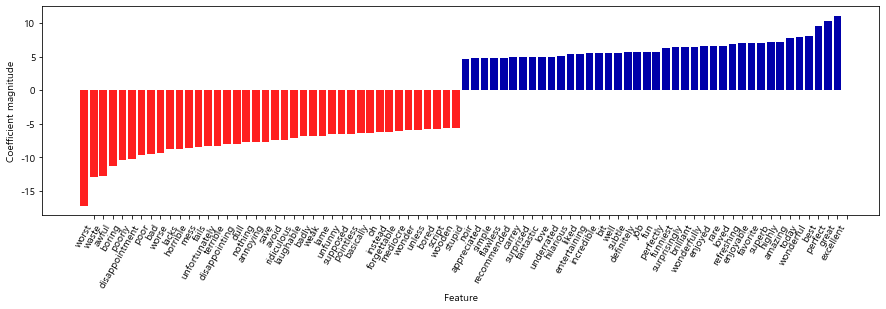

In [66]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_[0],
                                     feature_names,n_top_features=40)

음수계수는 모델에서 부정적인 리뷰를 의미하며 양수계수는 긍정적인 리뷰

# 여러 단어로 만든 BOW(n-그램)
BOW 방식은 단어의 순서가 완전히 무시되는 큰 단점이 존재한다. "it's bad,not good at all"과 "it's good,not bad at all"이 완전히 동일하게 변환된다. 'not'의 경우 문맥의 중요성을 잘 보여주는 예이다. 

BOW 표현시 문맥을 고려하는 방법이 있는데 토큰 하나의 횟수만 고려하지 않고 옆에 있는 두세 개의 토큰을 함께 고려하는 방식이다.<br>토큰 두 개를 bigram, 세 개를 trigram이라고 하며 일반적으로 연속된 토큰을 n-granm이라고 한다.<br>
CountVectorizer와 TfidVectorizer는 ngram_range 매개변수에 특성으로 고려할 토큰의 범위를 지정할 수 있다. 입력값은 연속된 토큰의 최소 길이와 최대 길이로 이루어진 토큰이다.

In [67]:
# 예시
bards_words

['The fool doth think he is wise',
 'but the wise man knows himself to be a fool']

In [68]:
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print("어휘 사전의 크기 : ",len(cv.vocabulary_))
print("어휘 사전 : \n",cv.get_feature_names())

어휘 사전의 크기 :  13
어휘 사전 : 
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [69]:
cv = CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print("어휘 사전의 크기 : ",len(cv.vocabulary_))
print("어휘 사전 : \n",cv.get_feature_names())

어휘 사전의 크기 :  14
어휘 사전 : 
 ['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [70]:
cv = CountVectorizer(ngram_range=(1,2)).fit(bards_words)
print("어휘 사전의 크기 : ",len(cv.vocabulary_))
print("어휘 사전 : \n",cv.get_feature_names())

어휘 사전의 크기 :  27
어휘 사전 : 
 ['be', 'be fool', 'but', 'but the', 'doth', 'doth think', 'fool', 'fool doth', 'he', 'he is', 'himself', 'himself to', 'is', 'is wise', 'knows', 'knows himself', 'man', 'man knows', 'the', 'the fool', 'the wise', 'think', 'think he', 'to', 'to be', 'wise', 'wise man']


단어 하나에 의미가 있는 경우가 많으므로 토큰의 최소 길이는 보통 1, 바이그램을 추가하면 도움이 되는데 길게는 5-그램까지 도움이 된다. 그러나 특성의 개수가 많아지면 과대적합될 가능성이 많고 메모리를 많이 사용하게 된다.  

In [74]:
pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(solver='liblinear'))
# 시간이 매우 오래 걸리므로 C는 0.1~100까지만 사용, ngram_range도 (1,1)부터 따져주는게 좋지만 메모리를 위해 생략
param_grid = {'logisticregression__C':np.logspace(0,2,3),
             'tfidfvectorizer__ngram_range':[(1,2),(1,3)]}
grid = GridSearchCV(pipe,param_grid=param_grid,cv=5)

In [75]:
# 주의) 시간이 매우매우매우 오래걸리므로 함부로 실행하지 마시오.

grid.fit(text_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=5,
                                                        ngram_range=(1, 1),
                                               

In [76]:
print('최상의 교차 검증 점수 : ',grid.best_score_)
print('최적의 매개변수 : ',grid.best_params_)

최상의 교차 검증 점수 :  0.9064400000000001
최적의 매개변수 :  {'logisticregression__C': 100.0, 'tfidfvectorizer__ngram_range': (1, 3)}


In [78]:
scores = grid.cv_results_['mean_test_score'].reshape(-1,2).T
scores

array([[0.89296, 0.90504, 0.90568],
       [0.8924 , 0.90636, 0.90644]])

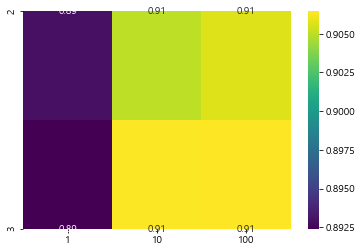

In [89]:
import seaborn as sns
sns.heatmap(scores,cmap='viridis',annot=True,xticklabels=[1,10,100],yticklabels=[2,3])

# 고급 토큰화: 어간 추출 (nltk 등)은 생략